# Data Preprocessing for sarcasm detection on youtube comments 

### Installation required python packages

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install tensorflow

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB ? eta -:--:--
     ---------------------------------- ---- 41.0/46.2 kB 98.5 kB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 109.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB ? eta -:--:--
   ---------------------------------------- 

## Loading dataset & Displayed some row's 

In [26]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'youtube_comments.csv'
df = pd.read_csv(file_path)


In [27]:
df.head()

,labels,cleaned_text
0,1,thanks for showing up for our appointment today
1,1,haha lol
2,1,i love waiting min for a cab such shortage ple...
3,1,22 super funny quotes funnyquotes funnysayings...
4,1,goog morning sorrynotsorry morning


## Data Cleaning 

**Clean the data by handling missing values, removing duplicates column**

In [28]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(f'Duplicate rows: {df.duplicated().sum()}')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Display the cleaned dataset
df.reset_index(drop=True, inplace=True)
df.head()

# Display the shape of the cleaned dataset
print(df.shape)

labels          0
cleaned_text    0
dtype: int64
Duplicate rows: 409
(19408, 2)


## Text preprocessing


**Text preprocessing includes converting text to lowercase, removing punctuation and special characters, tokenizing, and removing stopwords.**

In [30]:
print(df.columns)

Index(['labels', 'cleaned_text'], dtype='object')


In [32]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Load dataset
file_path = 'youtube_comments.csv'  # Update this path to your actual dataset path
df = pd.read_csv(file_path)

# Check the column names
print("Columns in the dataset:", df.columns)

# Data cleaning
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

# Text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_comment'] = df['cleaned_text'].apply(preprocess_text)

# Display the first few rows of the preprocessed dataset
print(df.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91636\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91636\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Columns in the dataset: Index(['labels', 'cleaned_text'], dtype='object')
   labels                                       cleaned_text  \
0       1    thanks for showing up for our appointment today   
1       1                                           haha lol   
2       1  i love waiting min for a cab such shortage ple...   
3       1  22 super funny quotes funnyquotes funnysayings...   
4       1                 goog morning sorrynotsorry morning   

                                     cleaned_comment  
0                   thanks showing appointment today  
1                                           haha lol  
2  love waiting min cab shortage please allow ube...  
3  22 super funny quotes funnyquotes funnysayings...  
4                 goog morning sorrynotsorry morning  


## Data Visualization

**Visualize the distribution of the labels to understand the **class** balance in  dataset.**

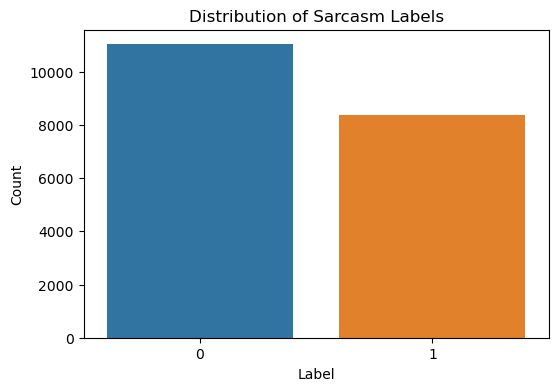

labels
0    11023
1     8385
Name: count, dtype: int64


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of labels
plt.figure(figsize=(6,4))
sns.countplot(x='labels', data=df)
plt.title('Distribution of Sarcasm Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Display the value counts of the labels
print(df['labels'].value_counts())

 ## Final Preparation

   

**Prepare the data for input into a deep learning model by splitting the data into training and testing sets, tokenizing, and padding the sequences.**

In [38]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Split the data into training and testing sets
X = df['cleaned_comment']
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_len = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Display the shape of the padded data
print(f'Training data shape: {X_train_pad.shape}')
print(f'Testing data shape: {X_test_pad.shape}')


Training data shape: (15526, 63)
Testing data shape: (3882, 63)


## Summary:

**Data Preprocessing:**


1.Loaded the dataset.

2.Cleaned the dataset by removing duplicates.

3.Preprocessed the text data by converting to lowercase, removing special characters, tokenizing, and removing stop words.



**Data Visualization:**

1.Visualized the distribution of sarcasm labels using a count plot.



**Data Preparation for Model Training:**

1.Split the data into training and testing sets.

2.Tokenized and padded the text sequences to ensure uniform input size.


*BY NARENDRA*